## Generalization의 중요성
- Penalizing the magnitude of coefficient

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20, 10

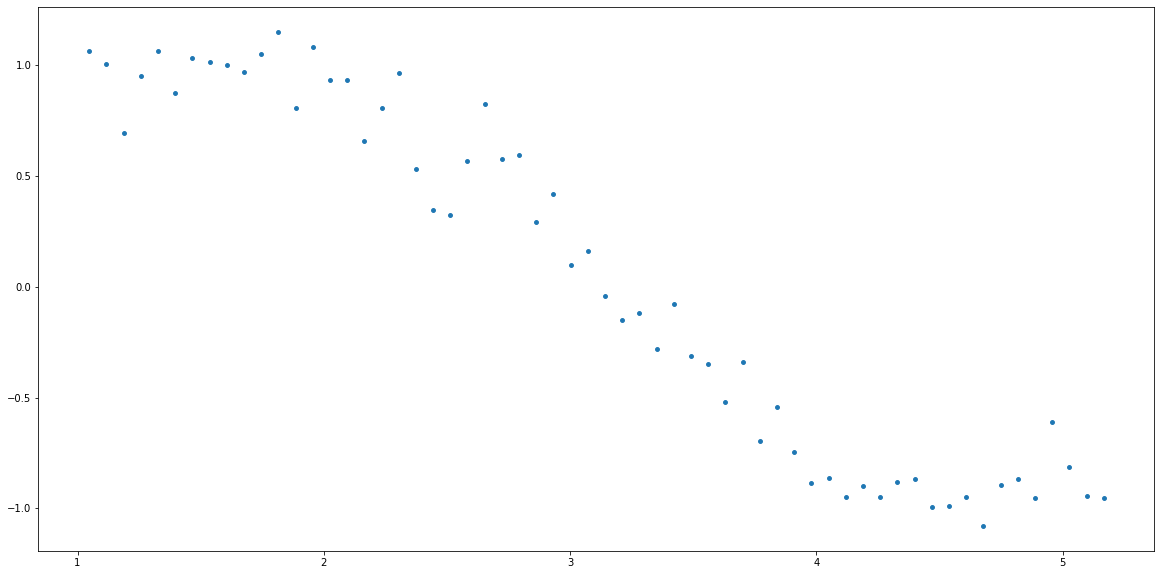

In [ ]:
x = np.array([i * np.pi/180 for i in range(60, 300, 4)])

np.random.seed(10)

y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.column_stack([x, y]), columns=['X', 'y'])

plt.scatter(data['X'], data['y'], s=15)
plt.show()

In [ ]:
for i in range(2, 16):
  col_name = 'X_%d'%i
  data[col_name] = data['X']**i
print(data.head(3))

             X            y          X_2          X_3          X_4  \
0 1.047198e+00 1.065763e+00 1.096623e+00 1.148381e+00 1.202581e+00   
1 1.117011e+00 1.006086e+00 1.247713e+00 1.393709e+00 1.556788e+00   
2 1.186824e+00 6.953738e-01 1.408551e+00 1.671702e+00 1.984016e+00   

           X_5          X_6          X_7          X_8          X_9  \
0 1.259340e+00 1.318778e+00 1.381021e+00 1.446202e+00 1.514459e+00   
1 1.738948e+00 1.942424e+00 2.169709e+00 2.423588e+00 2.707173e+00   
2 2.354677e+00 2.794587e+00 3.316683e+00 3.936319e+00 4.671717e+00   

          X_10         X_11         X_12         X_13         X_14  \
0 1.585938e+00 1.660790e+00 1.739176e+00 1.821260e+00 1.907219e+00   
1 3.023942e+00 3.377775e+00 3.773011e+00 4.214494e+00 4.707635e+00   
2 5.544505e+00 6.580351e+00 7.809718e+00 9.268760e+00 1.100039e+01   

          X_15  
0 1.997235e+00  
1 5.258479e+00  
2 1.305552e+01  


In [ ]:
from sklearn.linear_model import LinearRegression

def LR(data, power, plot):
  predictors = ['X']
  if power >= 2:
    predictors.extend(['X_%d'%i for i in range(2, power + 1)])

  reg = LinearRegression(normalize=True)
  reg.fit(data[predictors], data['y'])
  y_pred = reg.predict(data[predictors])

  if power in plot:
    plt.subplot(plot[power])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Power :  %d'%power)

  RSS = np.round(sum((y_pred - data['y'])**2), 3)
  result = [RSS]
  result.extend([np.round(reg.intercept_, 3)])
  result.extend(np.round(reg.coef_, 3))
  return result

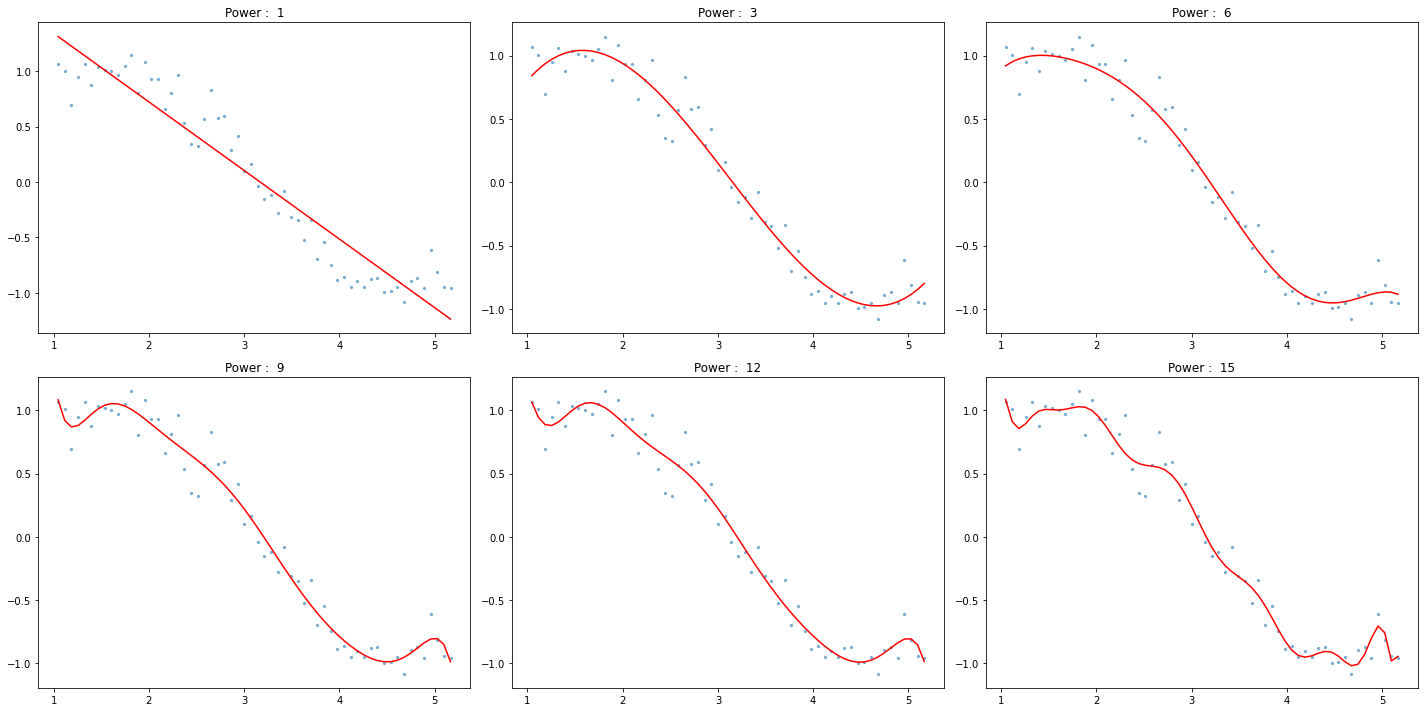

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['model_pow_%d'%i for i in range(1, 16)]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

for i in range(1, 16):
  coef_matrix.iloc[i - 1, 0 : i + 2] = LR(data, power=i, plot=plot)

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
model_pow_1,3.280000e+00,1.963000e+00,-6.200000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.277000e+00,1.914000e+00,-5.830000e-01,-6.000000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.103000e+00,-1.081000e+00,3.032000e+00,-1.286000e+00,1.370000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.079000e+00,-2.660000e-01,1.687000e+00,-5.320000e-01,-3.600000e-02,1.400000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.019000e+00,2.992000e+00,-5.118000e+00,4.725000e+00,-1.929000e+00,3.350000e-01,-2.100000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,9.900000e-01,-2.802000e+00,9.517000e+00,-9.713000e+00,5.226000e+00,-1.555000e+00,2.330000e-01,-1.400000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,9.280000e-01,1.930200e+01,-5.595200e+01,6.895600e+01,-4.463200e+01,1.651500e+01,-3.528000e+00,4.050000e-01,-1.900000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,9.180000e-01,4.316800e+01,-1.370130e+02,1.838250e+02,-1.334990e+02,5.767700e+01,-1.525300e+01,2.417000e+00,-2.100000e-01,8.000000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,8.750000e-01,1.678350e+02,-6.145130e+02,9.634030e+02,-8.464370e+02,4.609050e+02,-1.618490e+02,3.675800e+01,-5.221000e+00,4.220000e-01,-1.500000e-02,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,8.750000e-01,1.377170e+02,-4.861250e+02,7.261330e+02,-5.958810e+02,2.932560e+02,-8.745600e+01,1.454600e+01,-8.060000e-01,-1.380000e-01,2.600000e-02,-1.000000e-03,NaN,NaN,NaN,NaN,NaN


## Ridge and LASSO (Least Absolute Shrinkage and Selection Operator)

### General Linear Regression

$min(y - WX)^2$

### Ridge Regression

$min(y - WX)^2 + λ||W||^2_2$

### LASSO Regression

$min(y - WX)^2 + \lambda ||W||^1_1$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def ridge_regression(data, predictors, alpha, plot): # alpha가 람다
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Ridge with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

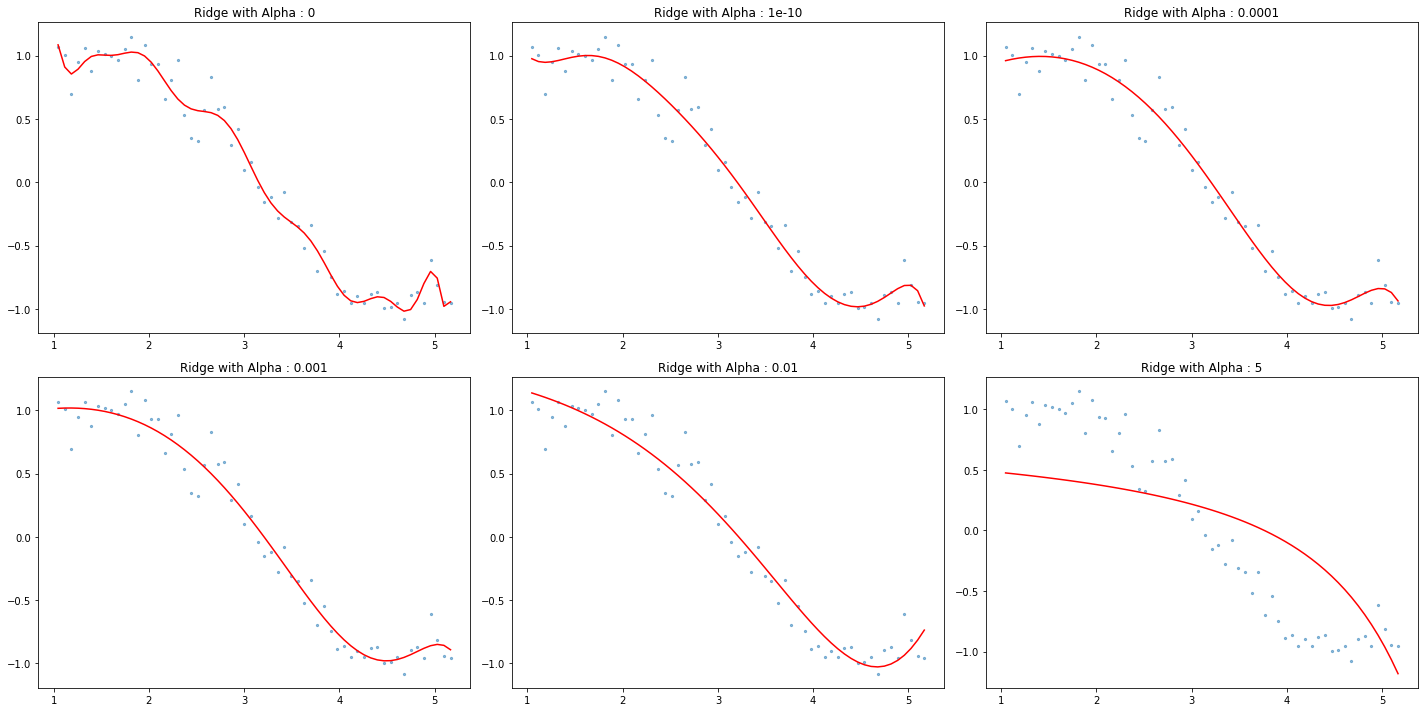

In [ ]:
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = ridge_regression(data, predictors, ridge_alpha[i], plot=plot)

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.226014e-01,1.117011e+01,-2.896290e+01,3.106938e+01,-1.523530e+01,2.891818e+00,1.693646e-01,-9.100186e-02,-1.083829e-02,1.983776e-03,6.369725e-04,2.408437e-05,-2.001130e-05,-4.203692e-06,2.193530e-07,2.272903e-07,-2.337408e-08
alpha : 1e-08,9.492921e-01,1.339994e+00,-1.530652e+00,1.749461e+00,-6.804584e-01,3.884301e-02,1.581786e-02,1.591800e-04,-3.595397e-04,-5.371822e-05,-2.910130e-07,1.080910e-06,1.893892e-07,1.961910e-08,3.928641e-09,8.190009e-10,-4.627223e-10
alpha : 0.0001,9.620184e-01,5.613205e-01,5.465491e-01,-1.281423e-01,-2.571298e-02,-2.820243e-03,-1.102989e-04,4.057499e-05,1.520747e-05,3.652391e-06,7.365854e-07,1.303511e-07,1.944499e-08,1.935329e-09,-1.302593e-10,-1.549432e-10,-6.177070e-11
alpha : 0.001,1.001776e+00,8.176382e-01,3.051465e-01,-8.668731e-02,-2.047550e-02,-2.836433e-03,-2.191995e-04,1.812031e-05,1.239899e-05,3.429712e-06,7.282243e-07,1.293461e-07,1.868652e-08,1.706217e-09,-1.510800e-10,-1.404477e-10,-5.160335e-11
alpha : 0.01,1.435788e+00,1.298887e+00,-8.839592e-02,-5.150014e-02,-1.009896e-02,-1.412439e-03,-1.315210e-04,7.230824e-07,4.136174e-06,1.304781e-06,2.964169e-07,5.615697e-08,8.971846e-09,1.094060e-09,4.292489e-11,-3.142258e-11,-1.487049e-11
alpha : 1,5.648744e+00,9.688857e-01,-1.390082e-01,-1.926803e-02,-3.004342e-03,-4.655190e-04,-6.970064e-05,-9.900640e-06,-1.292364e-06,-1.428457e-07,-9.330249e-09,1.306878e-09,7.803499e-10,2.402307e-10,6.156267e-11,1.445805e-11,3.227126e-12
alpha : 5,1.383832e+01,5.482603e-01,-5.886866e-02,-8.521666e-03,-1.419446e-03,-2.410036e-04,-4.083178e-05,-6.874313e-06,-1.148980e-06,-1.905338e-07,-3.131459e-08,-5.091884e-09,-8.169533e-10,-1.288036e-10,-1.982961e-11,-2.950057e-12,-4.162333e-13
alpha : 10,1.802483e+01,4.003424e-01,-3.723644e-02,-5.526795e-03,-9.496340e-04,-1.672916e-04,-2.958106e-05,-5.230317e-06,-9.245272e-07,-1.634447e-07,-2.891106e-08,-5.118376e-09,-9.071132e-10,-1.609540e-10,-2.859418e-11,-5.086237e-12,-9.058459e-13
alpha : 20,2.272055e+01,2.767034e-01,-2.246934e-02,-3.404918e-03,-5.993441e-04,-1.084581e-04,-1.974396e-05,-3.600769e-06,-6.575756e-07,-1.202802e-07,-2.204285e-08,-4.048138e-09,-7.450849e-10,-1.374475e-10,-2.541229e-11,-4.708773e-12,-8.743795e-13


In [ ]:
pd.options.display.float_format = lambda x: f'{x:e}'
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.226014e-01,1.117011e+01,-2.896290e+01,3.106938e+01,-1.523530e+01,2.891818e+00,1.693646e-01,-9.100186e-02,-1.083829e-02,1.983776e-03,6.369725e-04,2.408437e-05,-2.001130e-05,-4.203692e-06,2.193530e-07,2.272903e-07,-2.337408e-08
alpha : 1e-08,9.492921e-01,1.339994e+00,-1.530652e+00,1.749461e+00,-6.804584e-01,3.884301e-02,1.581786e-02,1.591800e-04,-3.595397e-04,-5.371822e-05,-2.910130e-07,1.080910e-06,1.893892e-07,1.961910e-08,3.928641e-09,8.190009e-10,-4.627223e-10
alpha : 0.0001,9.620184e-01,5.613205e-01,5.465491e-01,-1.281423e-01,-2.571298e-02,-2.820243e-03,-1.102989e-04,4.057499e-05,1.520747e-05,3.652391e-06,7.365854e-07,1.303511e-07,1.944499e-08,1.935329e-09,-1.302593e-10,-1.549432e-10,-6.177070e-11
alpha : 0.001,1.001776e+00,8.176382e-01,3.051465e-01,-8.668731e-02,-2.047550e-02,-2.836433e-03,-2.191995e-04,1.812031e-05,1.239899e-05,3.429712e-06,7.282243e-07,1.293461e-07,1.868652e-08,1.706217e-09,-1.510800e-10,-1.404477e-10,-5.160335e-11
alpha : 0.01,1.435788e+00,1.298887e+00,-8.839592e-02,-5.150014e-02,-1.009896e-02,-1.412439e-03,-1.315210e-04,7.230824e-07,4.136174e-06,1.304781e-06,2.964169e-07,5.615697e-08,8.971846e-09,1.094060e-09,4.292489e-11,-3.142258e-11,-1.487049e-11
alpha : 1,5.648744e+00,9.688857e-01,-1.390082e-01,-1.926803e-02,-3.004342e-03,-4.655190e-04,-6.970064e-05,-9.900640e-06,-1.292364e-06,-1.428457e-07,-9.330249e-09,1.306878e-09,7.803499e-10,2.402307e-10,6.156267e-11,1.445805e-11,3.227126e-12
alpha : 5,1.383832e+01,5.482603e-01,-5.886866e-02,-8.521666e-03,-1.419446e-03,-2.410036e-04,-4.083178e-05,-6.874313e-06,-1.148980e-06,-1.905338e-07,-3.131459e-08,-5.091884e-09,-8.169533e-10,-1.288036e-10,-1.982961e-11,-2.950057e-12,-4.162333e-13
alpha : 10,1.802483e+01,4.003424e-01,-3.723644e-02,-5.526795e-03,-9.496340e-04,-1.672916e-04,-2.958106e-05,-5.230317e-06,-9.245272e-07,-1.634447e-07,-2.891106e-08,-5.118376e-09,-9.071132e-10,-1.609540e-10,-2.859418e-11,-5.086237e-12,-9.058459e-13
alpha : 20,2.272055e+01,2.767034e-01,-2.246934e-02,-3.404918e-03,-5.993441e-04,-1.084581e-04,-1.974396e-05,-3.600769e-06,-6.575756e-07,-1.202802e-07,-2.204285e-08,-4.048138e-09,-7.450849e-10,-1.374475e-10,-2.541229e-11,-4.708773e-12,-8.743795e-13


In [ ]:
def lasso_regression(data, predictors, alpha, plot):
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Lasso(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Lasso with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

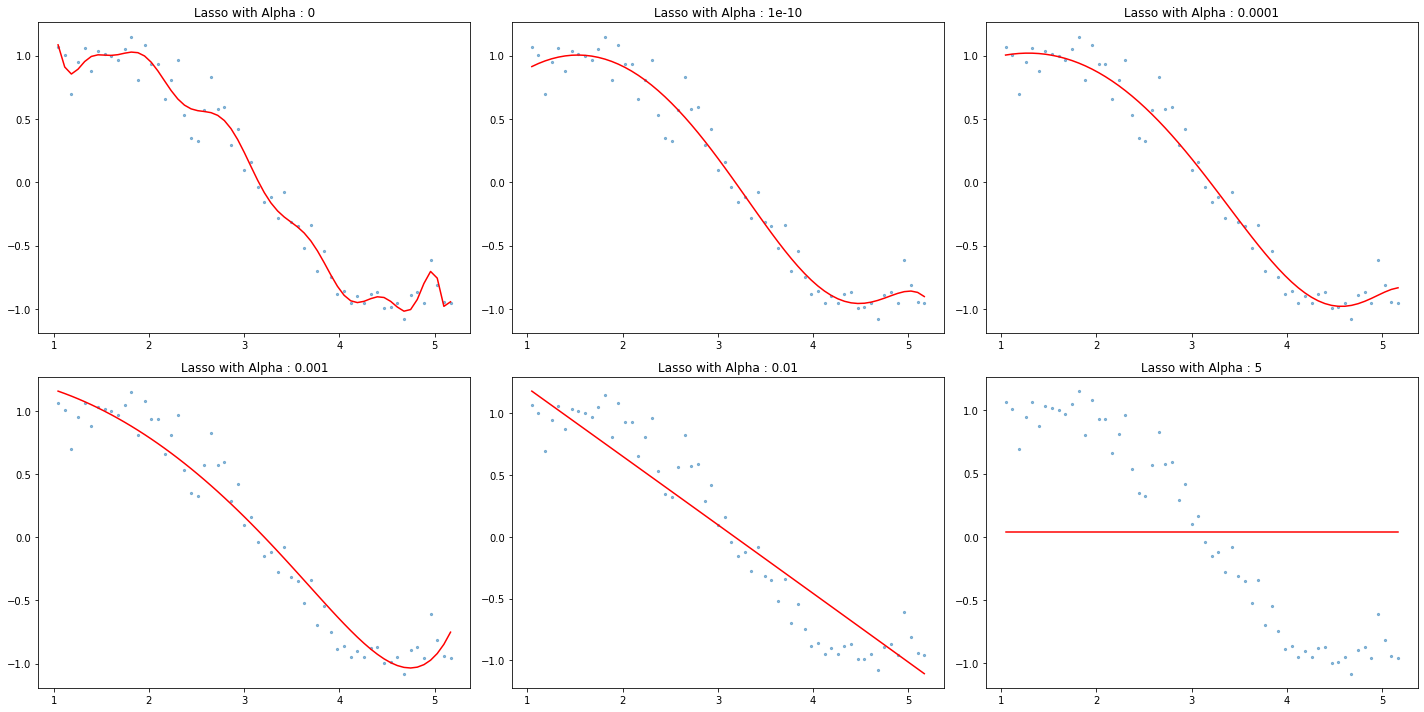

In [ ]:
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = lasso_regression(data, predictors, ridge_alpha[i], plot=plot)

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.730067e-01,1.358276e-01,1.086127e+00,-3.030930e-01,-2.366229e-02,-5.205817e-04,3.015160e-04,8.798707e-05,1.732897e-05,2.854704e-06,4.056757e-07,4.677639e-08,2.949573e-09,-5.342563e-10,-2.963984e-10,-9.026802e-11,-2.298282e-11
alpha : 1e-08,9.730047e-01,1.358788e-01,1.086071e+00,-3.030793e-01,-2.366200e-02,-5.204404e-04,3.013930e-04,8.799096e-05,1.732932e-05,2.854697e-06,4.056621e-07,4.677188e-08,2.948424e-09,-5.329120e-10,-2.964196e-10,-9.027707e-11,-2.298485e-11
alpha : 0.0001,1.042473e+00,6.132487e-01,5.963405e-01,-1.897246e-01,-2.204309e-02,-0.000000e+00,-0.000000e+00,1.098455e-05,2.355889e-05,3.179783e-06,3.153332e-07,4.414926e-09,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-2.903171e-11
alpha : 0.001,1.678833e+00,1.294625e+00,-0.000000e+00,-1.260874e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.496062e-08,7.526311e-10,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 0.01,3.639071e+00,1.759376e+00,-5.520656e-01,-5.623230e-04,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 1,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 5,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 10,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 20,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00


## 실습 1
- 아래 데이터셋으로 각각 결과를 출력하시오

1. 전체 변수를 사용했을 때의 linear regression 결과와 그 회귀 계수

2. 전체 변수를 사용했을 때의 ridge regression 결과와 그 회귀 계수

3. 전체 변수를 사용했을 때의 lasso regression 결과와 그 회귀 계수


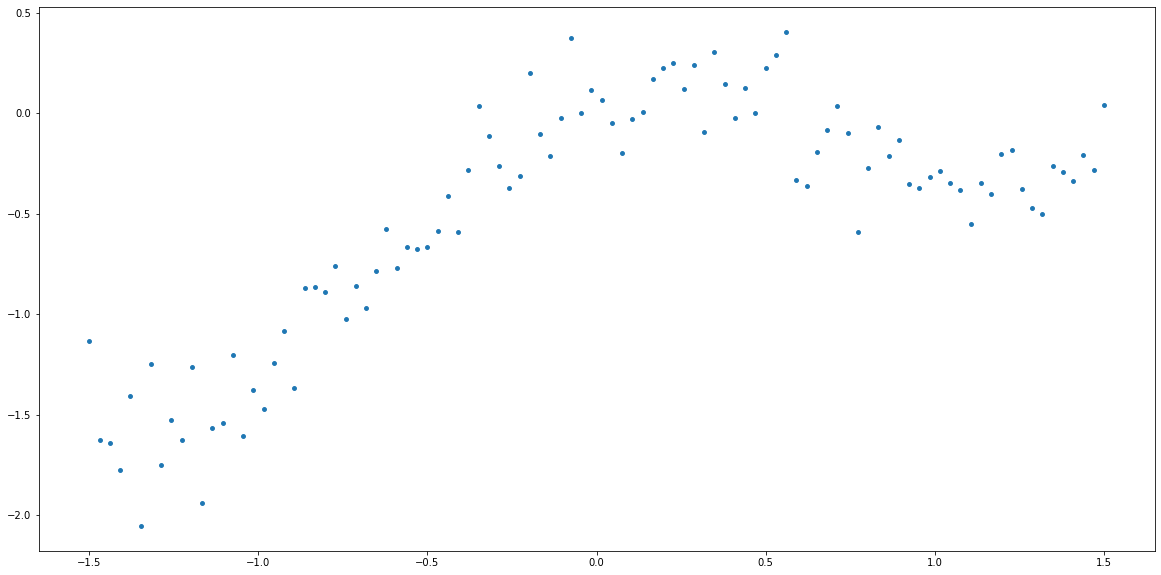

              X             y          X_2           X_3          X_4  \
0 -1.500000e+00 -1.134843e+00 2.250000e+00 -3.375000e+00 5.062500e+00   
1 -1.469697e+00 -1.624204e+00 2.160009e+00 -3.174559e+00 4.665640e+00   
2 -1.439394e+00 -1.641866e+00 2.071855e+00 -2.982215e+00 4.292583e+00   

            X_5          X_6           X_7          X_8           X_9  \
0 -7.593750e+00 1.139062e+01 -1.708594e+01 2.562891e+01 -3.844336e+01   
1 -6.857076e+00 1.007782e+01 -1.481135e+01 2.176819e+01 -3.199265e+01   
2 -6.178718e+00 8.893609e+00 -1.280141e+01 1.842627e+01 -2.652266e+01   

          X_10          X_11         X_12          X_13         X_14  \
0 5.766504e+01 -8.649756e+01 1.297463e+02 -1.946195e+02 2.919293e+02   
1 4.701950e+01 -6.910441e+01 1.015625e+02 -1.492662e+02 2.193760e+02   
2 3.817655e+01 -5.495110e+01 7.909628e+01 -1.138507e+02 1.638760e+02   

           X_15  
0 -4.378939e+02  
1 -3.224163e+02  
2 -2.358821e+02  


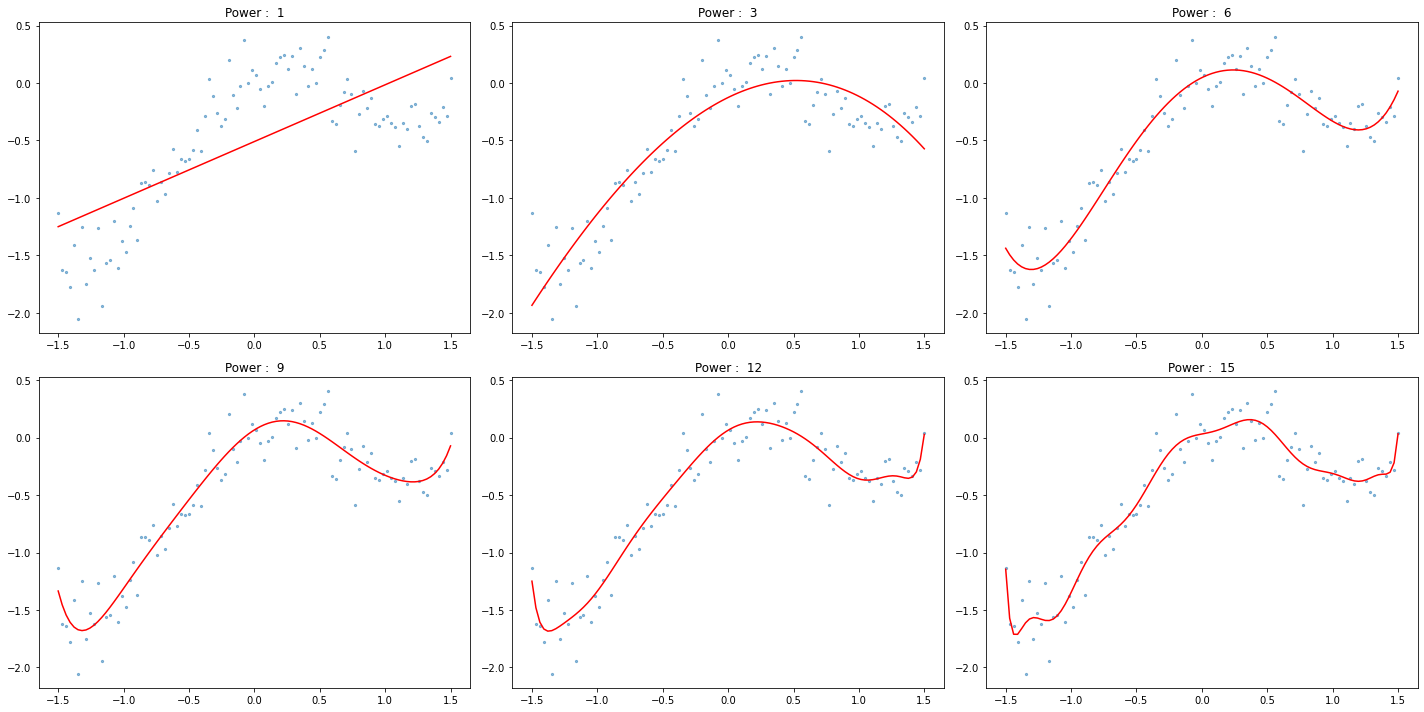

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

x = np.linspace(-1.5, 1.5, 100)
y = np.sin(0.5*x) - np.sin(x**2) + np.random.normal(0, 0.2, 100) 

data = pd.DataFrame(np.column_stack([x, y]), columns=['X', 'y'])

plt.scatter(data['X'], data['y'], s=15)
plt.show()

for i in range(2, 16):
  col_name = 'X_%d'%i
  data[col_name] = data['X']**i
print(data.head(3))

from sklearn.linear_model import LinearRegression

def LR(data, power, plot):
  predictors = ['X']
  if power >= 2:
    predictors.extend(['X_%d'%i for i in range(2, power + 1)])

  reg = LinearRegression(normalize=True)
  reg.fit(data[predictors], data['y'])
  y_pred = reg.predict(data[predictors])

  if power in plot:
    plt.subplot(plot[power])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Power :  %d'%power)

  RSS = np.round(sum((y_pred - data['y'])**2), 3)
  result = [RSS]
  result.extend([np.round(reg.intercept_, 3)])
  result.extend(np.round(reg.coef_, 3))
  return result

import warnings
warnings.filterwarnings(action='ignore')

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['model_pow_%d'%i for i in range(1, 16)]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

for i in range(1, 16):
  coef_matrix.iloc[i - 1, 0 : i + 2] = LR(data, power=i, plot=plot)

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,2.671630e+00,3.164673e-02,2.186679e-01,-1.195639e-01,6.241360e+00,-8.598104e+00,-2.784925e+01,2.601885e+01,5.180927e+01,-3.577212e+01,-4.875656e+01,2.517006e+01,2.444137e+01,-8.752165e+00,-6.216023e+00,1.191273e+00,6.290871e-01
alpha : 1e-10,2.672522e+00,3.269855e-02,2.577665e-01,-1.657885e-01,5.589412e+00,-8.265183e+00,-2.469301e+01,2.511854e+01,4.506132e+01,-3.461269e+01,-4.134697e+01,2.440398e+01,2.008456e+01,-8.501381e+00,-4.911962e+00,1.159052e+00,4.730513e-01
alpha : 1e-08,2.737457e+00,5.748552e-02,4.714552e-01,-1.259928e+00,2.215188e+00,-3.606373e-01,-9.031286e+00,3.693852e+00,1.268492e+01,-6.972909e+00,-6.761996e+00,6.115991e+00,2.107784e-01,-2.507759e+00,9.218918e-01,3.882538e-01,-2.134288e-01
alpha : 0.0001,2.907966e+00,5.636044e-02,6.428481e-01,-1.267394e+00,-3.372341e-01,2.621136e-01,1.798318e-01,1.791668e-01,3.204053e-02,-1.090512e-02,-1.958530e-02,-4.163414e-02,-7.924618e-03,-1.376088e-02,3.949767e-04,1.109087e-02,5.644090e-04
alpha : 0.001,2.960495e+00,3.949272e-02,5.810485e-01,-1.157031e+00,-1.308918e-01,2.313224e-01,2.980733e-02,7.721873e-02,1.772817e-02,-6.289333e-03,2.043909e-03,-1.208435e-02,-9.602945e-04,-2.542284e-03,-7.404959e-04,3.464950e-03,-4.384988e-04
alpha : 0.01,3.147796e+00,-8.792363e-03,4.969344e-01,-8.698399e-01,8.301131e-03,1.086734e-02,-1.533294e-03,4.262405e-02,9.776038e-04,1.569331e-02,3.818263e-04,3.731062e-03,-9.797621e-05,6.034778e-04,-2.457261e-04,1.495508e-04,-2.395683e-04
alpha : 1,1.149543e+01,-2.976217e-01,1.608379e-01,-1.913657e-01,6.350972e-02,-5.157749e-02,2.077134e-02,-1.242622e-02,6.207697e-03,-2.032919e-03,1.631508e-03,2.962351e-04,3.123170e-04,5.561388e-04,-1.255364e-05,4.011141e-04,-6.156998e-05
alpha : 5,2.053555e+01,-4.069708e-01,6.010392e-02,-6.471398e-02,2.996118e-02,-2.183337e-02,1.250264e-02,-7.406428e-03,5.030292e-03,-2.485449e-03,2.003787e-03,-8.153062e-04,7.968969e-04,-2.564431e-04,3.172993e-04,-7.450180e-05,1.265851e-04
alpha : 10,2.465109e+01,-4.422134e-01,3.610391e-02,-3.802811e-02,1.932476e-02,-1.373478e-02,8.588485e-03,-5.044215e-03,3.666625e-03,-1.863320e-03,1.546700e-03,-6.901952e-04,6.505119e-04,-2.555532e-04,2.736766e-04,-9.425256e-05,1.153097e-04
alpha : 20,2.857848e+01,-4.688998e-01,2.056974e-02,-2.134151e-02,1.154117e-02,-8.057723e-03,5.329322e-03,-3.100241e-03,2.351749e-03,-1.203379e-03,1.021664e-03,-4.703170e-04,4.412409e-04,-1.847658e-04,1.901726e-04,-7.284638e-05,8.192524e-05


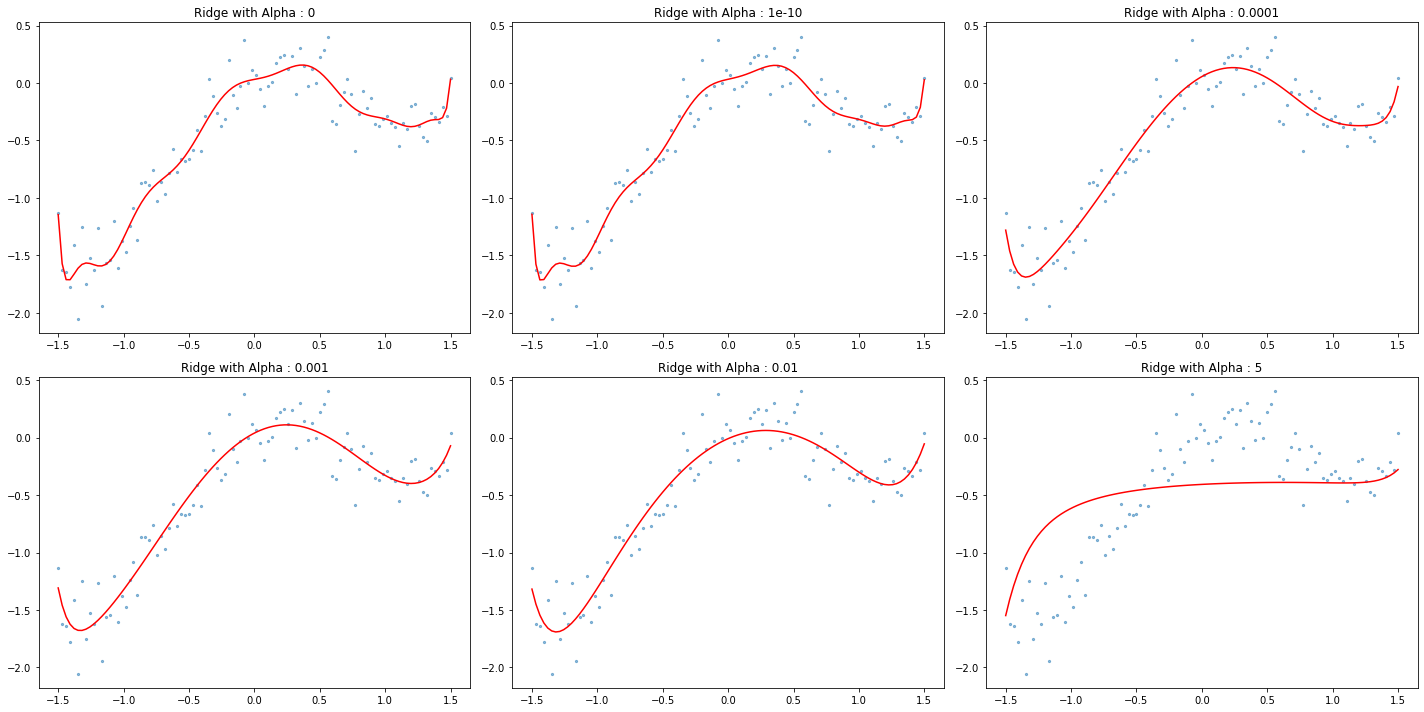

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def ridge_regression(data, predictors, alpha, plot): # alpha가 람다
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Ridge with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = ridge_regression(data, predictors, ridge_alpha[i], plot=plot)

coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,2.671630e+00,3.164673e-02,2.186679e-01,-1.195639e-01,6.241360e+00,-8.598104e+00,-2.784925e+01,2.601885e+01,5.180927e+01,-3.577212e+01,-4.875656e+01,2.517006e+01,2.444137e+01,-8.752165e+00,-6.216023e+00,1.191273e+00,6.290871e-01
alpha : 1e-10,2.930677e+00,6.168620e-02,6.200533e-01,-1.374844e+00,-2.522253e-01,5.591926e-01,1.262351e-01,-2.397599e-02,7.221107e-03,-3.665893e-02,-5.444929e-03,-9.415062e-03,-1.819624e-03,1.697669e-03,-4.159905e-04,3.658691e-03,-2.169125e-04
alpha : 1e-08,2.930681e+00,6.168130e-02,6.200306e-01,-1.374786e+00,-2.521384e-01,5.590905e-01,1.261609e-01,-2.393536e-02,7.218186e-03,-3.665229e-02,-5.427825e-03,-9.413081e-03,-1.821074e-03,1.692876e-03,-4.165225e-04,3.659580e-03,-2.170863e-04
alpha : 0.0001,3.018774e+00,2.955563e-02,5.211293e-01,-1.091809e+00,-1.033712e-02,1.972359e-01,-0.000000e+00,3.907271e-02,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,9.554291e-04,-2.386399e-04
alpha : 0.001,3.405404e+00,-4.571072e-02,4.863558e-01,-7.352019e-01,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,1.711842e-02,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-6.503134e-05
alpha : 0.01,7.934526e+00,-2.376005e-01,3.796275e-01,-3.549695e-01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 1,3.636078e+01,-5.092059e-01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
alpha : 5,3.636078e+01,-5.092059e-01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
alpha : 10,3.636078e+01,-5.092059e-01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
alpha : 20,3.636078e+01,-5.092059e-01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00


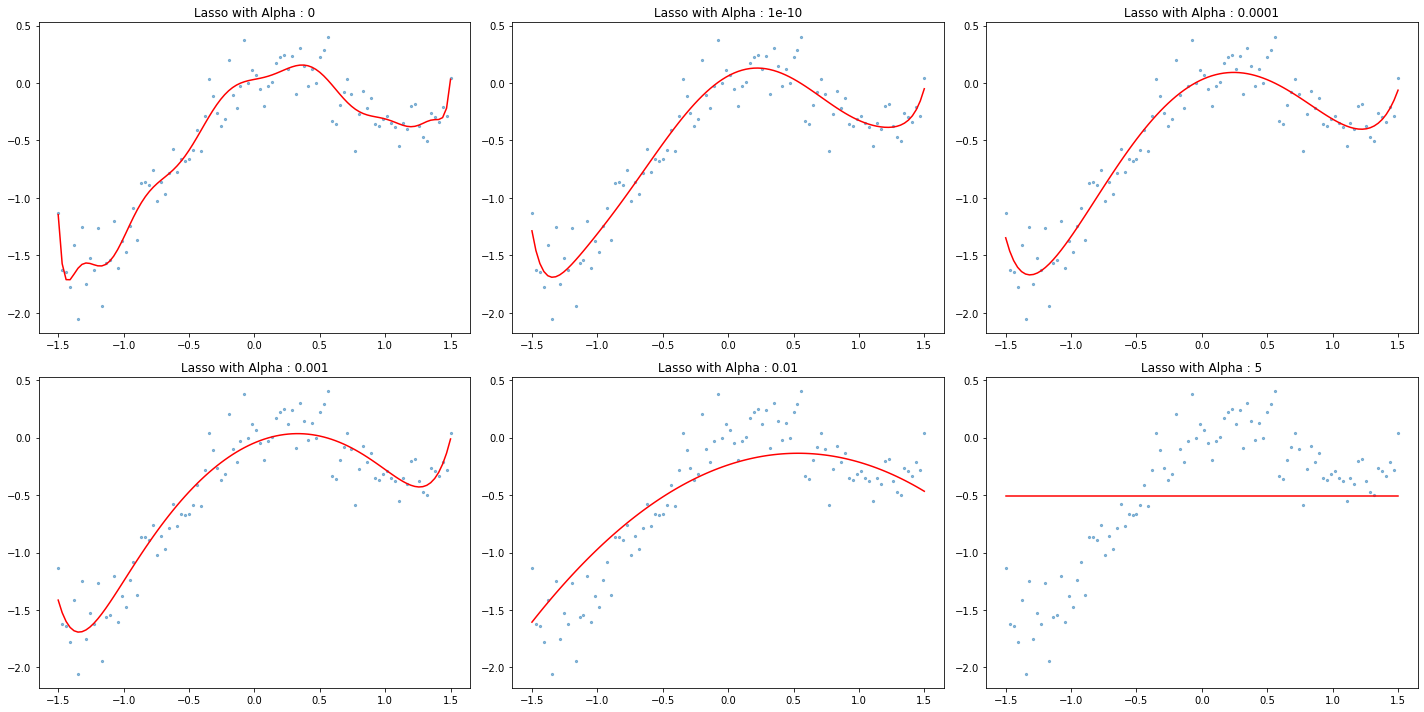

In [ ]:
def lasso_regression(data, predictors, alpha, plot):
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Lasso(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Lasso with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = lasso_regression(data, predictors, ridge_alpha[i], plot=plot)

coef_matrix